In [2]:
import pandas as pd
import numpy as np
import itertools

In [3]:
mov = pd.read_csv("movie_metadata.csv")

In [4]:
mov.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Explore the dataset and fill null values

In [5]:
mov.shape

(5043, 28)

In [6]:
#check if imdb score are between 1 & 10
sum(mov.imdb_score.between(0,10,inclusive=True))

5043

In [7]:
# Find out how many null values in the dataset
mov.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

In [8]:
def fill_with_mode(df,col_list=[]):
    for col in df[col_list]:
        mode = df[col].mode()[0]
        df[col].fillna(mode,inplace=True)
        
def fill_with_mean(df,col_list=[]):
    for col in df[col_list]:
        mean = df[col].mean()
        df[col].fillna(mean,inplace=True)

In [9]:
mov_clean = mov

In [10]:
# change title_year to years_old
mov_clean['years_old'] = 2018 - mov_clean['title_year']

#change plot_keywords to no_plot_keywords
mov_clean['no_plot_keywords'] = mov_clean['plot_keywords'].apply(lambda x: len(x.split('|')) if type(x) == str else 0)

# remove unncessary columns
dropcol = ['title_year','plot_keywords']
mov_clean = mov_clean.drop(dropcol,axis=1)

In [11]:
fill_with_mean(mov_clean,['gross','budget','years_old'])
fill_with_mode(mov_clean,['color','facenumber_in_poster', 'duration', 'aspect_ratio','content_rating'])

In [12]:
# columns to fill with 0 or None
fill_0 = ['actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes','num_user_for_reviews','director_facebook_likes','num_critic_for_reviews']
fill_none = ['actor_1_name','actor_2_name','actor_3_name','director_name']

In [13]:
# Fill the null values/NaN with 0 or 'None
mov_clean[fill_0] = mov_clean[fill_0].fillna(0)
mov_clean[fill_none] = mov_clean[fill_none].fillna('None')

In [14]:
# Find out how many null values are left in the dataset
mov_clean.isnull().sum().sort_values(ascending=False)

language                     12
country                       5
no_plot_keywords              0
num_voted_users               0
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
cast_total_facebook_likes     0
years_old                     0
actor_3_name                  0
facenumber_in_poster          0
movie_imdb_link               0
num_user_for_reviews          0
content_rating                0
budget                        0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
color                         0
dtype: int64

## Visualize

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

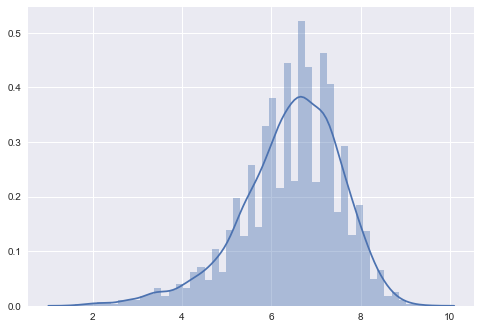

In [16]:
# Distribution of the target variable 'imdb_score'
sns.distplot((mov_clean[['imdb_score']]))

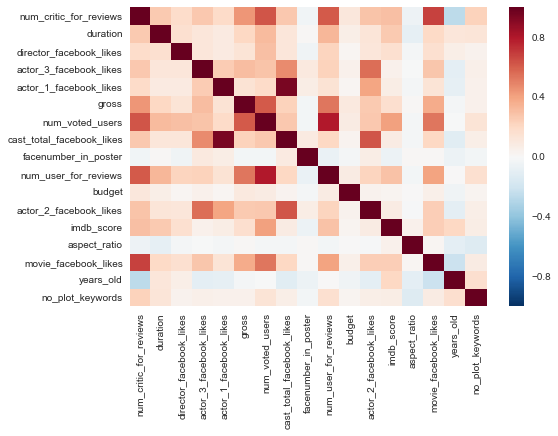

In [17]:
sns.heatmap(mov_clean.corr())

In [18]:
# select fewer usable columns by looking at the heatmap with correlations
mov_clean_sel = mov_clean[['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
       'num_voted_users', 'facenumber_in_poster', 'no_plot_keywords',   
       'aspect_ratio', 'years_old', 'budget', 'imdb_score']]

In [19]:
# Min-Max Scaling on features & target variable
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
cols = mov_clean_sel.columns
mov_clean_sel = pd.DataFrame(minmax_scale.fit_transform(mov_clean_sel),columns=cols)

In [20]:
# divide to train & test sets
train = mov_clean_sel.sample(frac=0.8,random_state=200)
train_y, train_x = train[['imdb_score']], train.drop(['imdb_score'],axis=1)

test = mov_clean_sel.drop(train.index)
test_y, test_x = test[['imdb_score']], test.drop(['imdb_score'],axis=1)

In [42]:
#set(mov_clean['genres'].apply(lambda x: x.split('|')).sum())

In [21]:
mov_clean['content_rating'].value_counts(dropna=False);

In [375]:
mov_clean.loc[mov_clean['content_rating'].isnull(),['movie_title']];

In [132]:
mov_clean['content_rating'].isnull().sum()

303

## Sci-kit learn Models

In [22]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# y_hat = the predictions for the test set
y_hat = linreg.predict(test_x)

In [24]:
from sklearn import metrics

In [38]:
# Root Mean Square error for the sklearn liner regression model
np.sqrt(metrics.mean_squared_error(y_pred=y_hat,y_true=test_y))

0.12459109898812218

In [39]:
# mean Absolute Error for the sklearn linear regression model
metrics.mean_absolute_error(y_hat,test_y)

0.09501139962989615

## Tensorflow - Linear Regression Model

In [30]:
import tensorflow as tf

/Users/bharatvem/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
FEATURES = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'num_voted_users', 'facenumber_in_poster',
       'no_plot_keywords', 'aspect_ratio', 'years_old', 'budget']

In [32]:
def pd_input_fn(x,y, num_epochs=None):  # a Pandas dataframe
  return tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({k: x[k].values for k in FEATURES}),
    y = pd.Series(y['imdb_score'].values),
    num_epochs=num_epochs,
    shuffle=False)

def eval_input_fn(x,y, num_epochs=None):  # a Pandas dataframe
  return tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({k: x[k].values for k in FEATURES}),
    y = pd.Series(y['imdb_score'].values),
    num_epochs=num_epochs,
    shuffle=False)

def test_input_fn(x, num_epochs=None):  # a Pandas dataframe
  return tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({k: x[k].values for k in FEATURES}),
    y = None,
    num_epochs=num_epochs,
    shuffle=False)

In [33]:
# define the type of columns that are sent in the input **for the Regression model**
featcols = [tf.feature_column.numeric_column("num_critic_for_reviews"),
    tf.feature_column.numeric_column("duration"),
    tf.feature_column.numeric_column("director_facebook_likes"),
    tf.feature_column.numeric_column("actor_1_facebook_likes"),
    tf.feature_column.numeric_column("actor_2_facebook_likes"),
    tf.feature_column.numeric_column("actor_3_facebook_likes"),
    tf.feature_column.numeric_column("num_voted_users"),
    tf.feature_column.numeric_column("facenumber_in_poster"),
    tf.feature_column.numeric_column("no_plot_keywords"),
    tf.feature_column.numeric_column("aspect_ratio"),
    tf.feature_column.numeric_column("years_old"),
    tf.feature_column.numeric_column("budget")
]

In [36]:
# create a LinearRegression model
model = tf.estimator.LinearRegressor(featcols,'./model_trained')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1275dd9b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [35]:
# train the model by passing the train & target dataframes
model.train(pd_input_fn(train_x,train_y,100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_trained/model.ckpt-9304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9305 into ./model_trained/model.ckpt.
INFO:tensorflow:loss = 178.91039, step = 9305
INFO:tensorflow:global_step/sec: 282.524
INFO:tensorflow:loss = 177.38213, step = 9405 (0.356 sec)
INFO:tensorflow:global_step/sec: 443.108
INFO:tensorflow:loss = 182.18378, step = 9505 (0.226 sec)
INFO:tensorflow:global_step/sec: 375.176
INFO:tensorflow:loss = 185.4787, step = 9605 (0.265 sec)
INFO:tensorflow:global_step/sec: 454.434
INFO:tensorflow:loss = 194.48843, step = 9705 (0.221 sec)
INFO:tensorflow:global_step/sec: 427.515
INFO:tensorflow:loss = 192.68158, step = 9805 (0.234 sec)
INFO:tensorflow:global_step/sec: 440.314
INFO:tensorflow:loss = 183.328,

In [40]:
# y_hat = predictions for the test set from the TF-LinearRegression Model
y_hat = model.predict(test_input_fn(test_x,None))

In [41]:
# Extract the predictions from the Generator object y_hat
p = [p['predictions'][0] for p in itertools.islice(y_hat,len(test_y))]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_trained/model.ckpt-12456
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
# Root mean square error on the test set for the prediction model
np.sqrt(metrics.mean_squared_error(y_pred=p,y_true=test_y['imdb_score']))

1.2054232865280126

In [43]:
# mean Absolute Error for the tensorflow linear regression model
metrics.mean_absolute_error(p,test_y)

1.1932372017187955

## dnn regressor (Deep Neural Net)

In [44]:
# Create a TensorFlow DNN Regressor
regressor = tf.estimator.DNNRegressor(feature_columns=featcols,
                                      hidden_units=[150,140,100,90,50,45,30,10,5,2],
                                      model_dir='./model_trained_dnn')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model_trained_dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1275ddba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
# Train the DNN classifier 
regressor.train(input_fn=pd_input_fn(train_x,train_y,100), steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into ./model_trained_dnn/model.ckpt.
INFO:tensorflow:loss = 49.93292, step = 1
INFO:tensorflow:global_step/sec: 243.29
INFO:tensorflow:loss = 2.809509, step = 101 (0.412 sec)
INFO:tensorflow:global_step/sec: 298.811
INFO:tensorflow:loss = 3.9071941, step = 201 (0.335 sec)
INFO:tensorflow:global_step/sec: 296.9
INFO:tensorflow:loss = 2.4852052, step = 301 (0.337 sec)
INFO:tensorflow:global_step/sec: 289.637
INFO:tensorflow:loss = 2.5219283, step = 401 (0.345 sec)
INFO:tensorflow:global_step/sec: 287.573
INFO:tensorflow:loss = 2.9966216, step = 501 (0.348 sec)
INFO:tensorflow:global_step/sec: 314.81
INFO:tensorflow:loss = 2.696396, step = 601 (0.318 sec)
INFO:tensorflow:global_step/sec: 261.202
INFO:tensorflow:loss

In [46]:
# Evaluate the model on test set
regressor.evaluate(eval_input_fn(test_x,test_y,100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-01-00:52:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_trained_dnn/model.ckpt-3152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-01-00:52:10
INFO:tensorflow:Saving dict for global step 3152: average_loss = 0.02046477, global_step = 3152, loss = 2.6171043


{'average_loss': 0.02046477, 'global_step': 3152, 'loss': 2.6171043}

In [47]:
# Get other evaluation metrics by getting the prediction on test set
p = [p['predictions'][0] for p in itertools.islice(regressor.predict(test_input_fn(test_x)),len(test_y))]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model_trained_dnn/model.ckpt-3152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
# Root Mean Square Error on the test set
np.sqrt(metrics.mean_squared_error(y_pred=p,y_true=test_y['imdb_score']))

0.14305512106517762

In [49]:
# mean Absolute Error for the tensorflow DNN model
metrics.mean_absolute_error(p,test_y)

0.1127656910882207